In [2]:
# TODO:
#    - Implement get_filter
#    - Resolve off by 1 situation with output (which is G_fourier_coeffs)
#    - Implement batching from the hardrive of directory of patch images

In [1]:
from scipy import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

(41, 41, 99999)


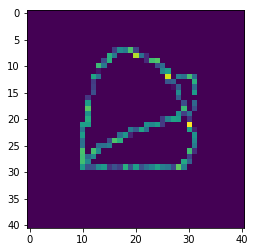

In [6]:
# Load all of the training data
patches = None
kernels = None

o = io.loadmat('../../data/kernels/train_kernels.mat')
kernels = o['kernels']


In [8]:
# Notes:
# We are going to officially make the training data on the fly during training.

n_nodes_hl1 = 1024
n_nodes_hl2 = 2048
n_nodes_hl3 = 4096
n_nodes_hl4 = 4096
n_nodes_hl5 = 4096

n_output = 4096 # total size of G_fourier_coeffs

batch_size = 512


x = tf.placeholder('float', [None, n_pixels])
y = tf.placeholder('float')


def neural_network_model(data):
    
    ## --- Adjacently Connected Layer () ---
    
    # Layer 1: 3 Networks each with 1024 neurons. Connected only to adjacent filters of patch
    #          filters = (L, B1, B2, H)
    hidden_1_1_layer = {'weights':tf.Variable(tf.random_normal([******, n_nodes_hl1])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl1]))}
    hidden_1_2_layer = {'weights':tf.Variable(tf.random_normal([******, n_nodes_hl1])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl1]))}
    hidden_1_3_layer = {'weights':tf.Variable(tf.random_normal([******, n_nodes_hl1])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl1]))}
    
    # Layer 2: 2 Networks each with 2048 neurons. Connected only to adjacent filters of patch
    #          filters = (L, B1, B2, H)
    hidden_2_1_layer = {'weights':tf.Variable(tf.random_normal([2*n_nodes_hl1, n_nodes_hl2])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl2]))}
    hidden_2_2_layer = {'weights':tf.Variable(tf.random_normal([2*n_nodes_hl1, n_nodes_hl2])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl2]))}
    
    
    # Fully Connected Hidden Layers right before filter fourier coefficients (4096 Neurons)
    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([2*n_nodes_hl2, n_nodes_hl3])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl3]))}
    hidden_4_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl4]))}
    hidden_5_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl4, n_nodes_hl5])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl5]))}
    
    
    
    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl5, n_output])),
                       'biases': tf.Variable(tf.random_normal([n_output]))}
    
    
    L, B1, B2, H = get_filter(data)
    
    l1_1 = tf.add(tf.matmul(np.append(L,B1), hidden_1_1_layer['weights']), hidden_1_1_layer ['biases'])
    l1_1 = tf.nn.relu(l1_1)
    l1_2 = tf.add(tf.matmul(np.append(B1,B2), hidden_1_2_layer['weights']), hidden_1_2_layer ['biases'])
    l1_2 = tf.nn.relu(l1_2)
    l1_3 = tf.add(tf.matmul(np.append(B2,H), hidden_1_3_layer['weights']), hidden_1_3_layer ['biases'])
    l1_3 = tf.nn.relu(l1_3)
    
    l2_1 = tf.add(tf.matmul(np.append(l1_1, l1_2), hidden_2_1_layer['weights']), hidden_2_1_layer ['biases'])
    l2_1 = tf.nn.relu(l2_1)
    l2_2 = tf.add(tf.matmul(np.append(l1_2, l1_3), hidden_2_2_layer['weights']), hidden_2_2_layer ['biases'])
    l2_2 = tf.nn.relu(l2_2)
    
    l3 = tf.add(tf.matmul(l3, hidden_4_layer['weights']), hidden_4_layer ['biases'])
    l3 = tf.nn.relu(l4)
    l4 = tf.add(tf.matmul(l3, hidden_4_layer['weights']), hidden_4_layer ['biases'])
    l4 = tf.nn.relu(l4)
    l5 = tf.add(tf.matmul(l4, hidden_5_layer['weights']), hidden_5_layer ['biases'])
    l5 = tf.nn.relu(l5)
    
    output = tf.add(tf.matmul(l5, output_layer['weights']), output_layer ['biases'])
    return output


def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    epochs = 10
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(epochs):
            epoch_loss = 0
            
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                
                _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y: epoch_y})
                epoch_loss = c
            print('Epoch',epoch, 'completed out of ', epochs, 'loss: ', epoch_loss)
        
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y,1))
        
        accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        
        print('Accuracy: ', accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))


train_neural_network(x)

NameError: name 'tf' is not defined

In [3]:
import numpy as np
a = np.array([1,2,3])
b = np.array([4,5,6])
print(a, b)
c = np.append(a,b)
print(c)

[1 2 3] [4 5 6]
[1 2 3 4 5 6]
